# Import

In [ ]:
import face_recognition
import numpy as np
import os
import cv2
from tqdm import tqdm

from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from collections import defaultdict

# Constantes

In [52]:
PATH_REDUCED_FOLDER = "data/reduced"
PATH_REDUCED_FOLDER_TO_TEST = "data/reduced/data_reduit_10"

PATH_FACE_FOLDER = "data/faces"

# Création Dossier Output

In [53]:
if not os.path.exists(PATH_FACE_FOLDER):
    os.makedirs(PATH_FACE_FOLDER)

In [79]:
for folder_name in os.listdir(PATH_REDUCED_FOLDER):
    input_folder = os.path.join(PATH_REDUCED_FOLDER, folder_name)
    output_folder = os.path.join(PATH_FACE_FOLDER, folder_name)
    
    if os.path.isdir(input_folder):

        if os.path.exists(output_folder):
            for file in os.listdir(output_folder):
                file_path = os.path.join(output_folder, file)
                if os.path.isfile(file_path):
                    os.remove(file_path)
        else:
            os.makedirs(output_folder)  

        images = sorted([f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

        all_faces_data = []
        face_global_id = 0  # Compteur pour chaque visage crop

        for img_name in images:
            img_path = os.path.join(input_folder, img_name)
            
            # Utilise face_recognition pour lire l'image (ou cv2, au choix)
            image = face_recognition.load_image_file(img_path)
            
            # Localisations des visages
            face_locations = face_recognition.face_locations(image, model="hog") 
            # model="hog" est plus rapide que "cnn"
            
            # Embeddings de chaque visage
            face_encodings = face_recognition.face_encodings(image, face_locations, model="large")
            # model="large" est plus précis que "small"
            # “small” (default) returns 5 points but is faster.
            
            for i, (loc, enc) in enumerate(zip(face_locations, face_encodings)):
                top, right, bottom, left = loc
                
                # Crop du visage (en se basant sur face_recognition qui renvoie en (top, right, bottom, left))
                face_image = image[top:bottom, left:right]
                
                # Convertir en format BGR pour l’enregistrement avec cv2
                face_image_bgr = cv2.cvtColor(face_image, cv2.COLOR_RGB2BGR)
                
                face_crop_name = f"{os.path.splitext(img_name)[0]}_face{face_global_id}.jpg"
                face_crop_path = os.path.join(output_folder, face_crop_name)
                
                # Sauvegarde du crop
                cv2.imwrite(face_crop_path, face_image_bgr)
                
                # Sauvegarder infos dans la liste
                all_faces_data.append({
                    "face_id": face_global_id,
                    "embedding": enc,
                    "photo_name": img_name,
                    "crop_path": face_crop_path
                })
                
                face_global_id += 1
            
            print(f"[OK] {len(face_encodings)} visages détectés dans {img_name}.")

[OK] 0 visages détectés dans IMG_2731.JPG.
[OK] 2 visages détectés dans IMG_2732.JPG.
[OK] 0 visages détectés dans IMG_2733.JPG.
[OK] 5 visages détectés dans IMG_2734.JPG.
[OK] 3 visages détectés dans IMG_2735.JPG.
[OK] 1 visages détectés dans IMG_2736.JPG.
[OK] 2 visages détectés dans IMG_2737.JPG.
[OK] 2 visages détectés dans IMG_2738.JPG.
[OK] 1 visages détectés dans IMG_2739.JPG.
[OK] 4 visages détectés dans IMG_2740.JPG.
[OK] 1 visages détectés dans IMG_2741.JPG.
[OK] 1 visages détectés dans IMG_2742.JPG.
[OK] 1 visages détectés dans IMG_2743.JPG.
[OK] 1 visages détectés dans IMG_2744.JPG.
[OK] 1 visages détectés dans IMG_2745.JPG.
[OK] 1 visages détectés dans IMG_2748.JPG.
[OK] 0 visages détectés dans IMG_2753.JPG.
[OK] 1 visages détectés dans IMG_2754.JPG.
[OK] 0 visages détectés dans IMG_2755.JPG.
[OK] 0 visages détectés dans IMG_2756.JPG.
[OK] 3 visages détectés dans IMG_2759.JPG.
[OK] 1 visages détectés dans IMG_2760.JPG.
[OK] 0 visages détectés dans IMG_2761.JPG.
[OK] 0 visa

# Clustering

In [80]:
# On récupère tous les embeddings dans un array numpy
embeddings = np.array([face["embedding"] for face in all_faces_data])

# Appliquer DBSCAN
dbscan = DBSCAN(metric='euclidean', eps=0.5, min_samples=2)
dbscan.fit(embeddings)

labels = dbscan.labels_  # cluster_id pour chaque embedding (ou -1 si outlier)

for i, face in enumerate(all_faces_data):
    face["cluster_id"] = labels[i]

print(f"Nombre de clusters trouvés (hors -1) : {len(set(labels) - {-1})}")



Nombre de clusters trouvés (hors -1) : 12


# Visualisation Clusters

Clusters ignorés (outliers) : ['data/faces/24_10_09 Soirée oeno/IMG_2732_face0.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2732_face1.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2734_face2.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2734_face3.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2734_face5.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2734_face6.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2735_face8.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2735_face9.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2736_face10.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2737_face12.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2738_face13.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2738_face14.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2739_face15.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2740_face16.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2740_face18.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2740_face19.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2741_face20.jpg', 'data/faces/24_10_09 Soirée oeno/IMG_2743_

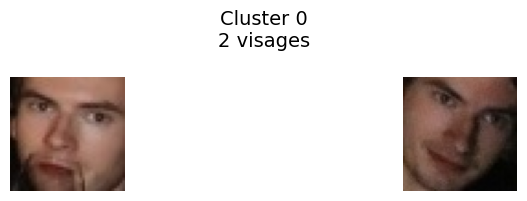

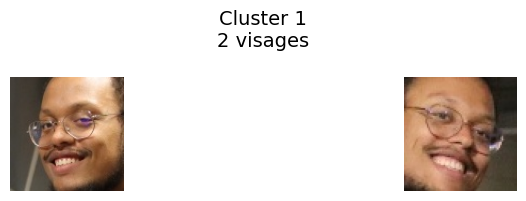

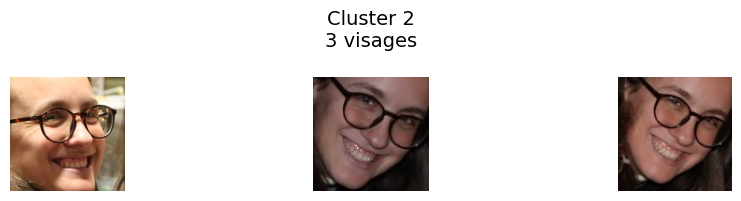

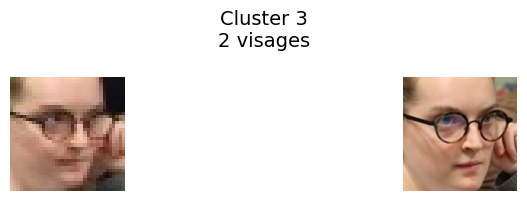

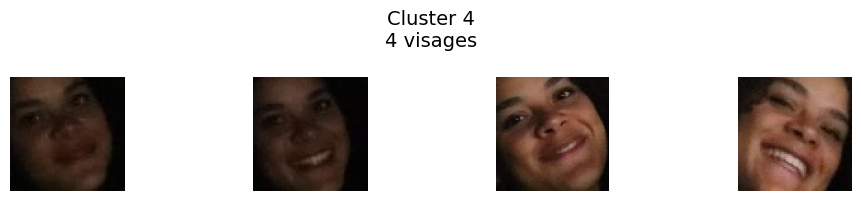

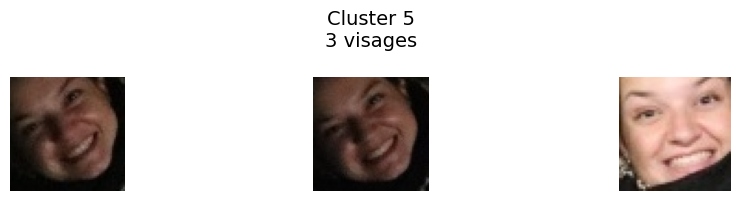

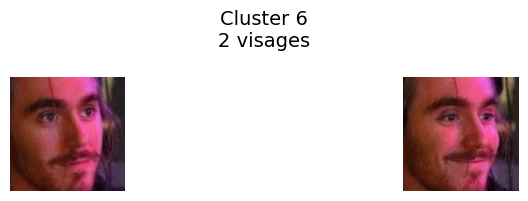

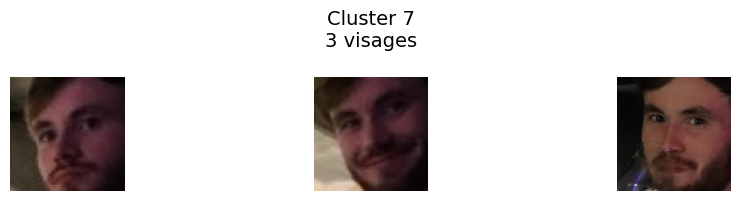

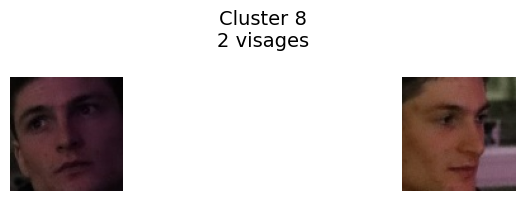

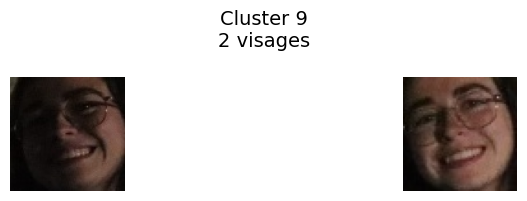

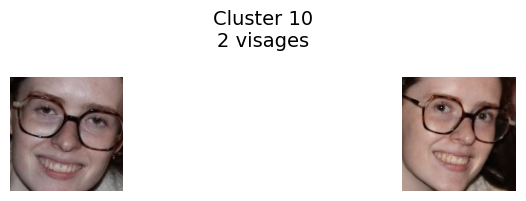

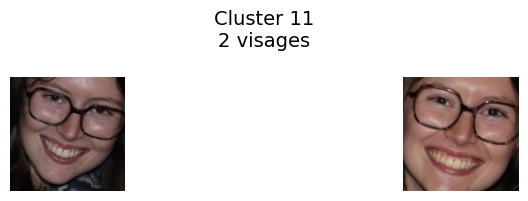

In [ ]:
# Regrouper les visages par cluster_id
clusters_dict = defaultdict(list)
for face in all_faces_data:
    cluster_id = face["cluster_id"]
    clusters_dict[cluster_id].append(face["crop_path"])

# Ignorer le cluster -1 (outliers), si souhaité
cluster_ids = sorted([cid for cid in clusters_dict.keys() if cid != -1])

print(f"Clusters ignorés (outliers) : {clusters_dict.get(-1, [])}")
print(f"Clusters valides : {cluster_ids}")

for cid in cluster_ids:
    face_paths = clusters_dict[cid]
    
    # On ouvre une nouvelle figure pour chaque cluster
    plt.figure(figsize=(10, 2))
    plt.suptitle(f"Cluster {cid}\n{len(face_paths)} visages", fontsize=14)
    
    # Afficher un échantillon de visages (jusqu’à max_faces_per_cluster)
    sample_paths = face_paths[:5]
    
    for i, path in enumerate(sample_paths):
        img_bgr = cv2.imread(path)
        if img_bgr is None:
            continue
        # Convertir en RGB pour matplotlib
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, len(sample_paths), i+1)
        plt.imshow(img_rgb)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
